In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5379696290311093576
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1227620960850170813
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10209080472480026267
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6034447137817017442
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
#Tensorflow for model training 
import tensorflow as tf
#data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#preprocessing
from keras.preprocessing.image import ImageDataGenerator

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import random as rn

from tensorflow.python.keras import backend as k
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#To convert features into categorical values
import keras.utils
from keras.utils import to_categorical

In [11]:
#Flower types in the plants folder
print(os.listdir('/content/drive/My Drive/Plants'))

['B', 'C', 'F', 'D', 'E', 'A']


In [0]:
#Creatig the directory path for the photographs
X=[]
Z=[]
IMG_SIZE=416
FLOWER_cat_grass_DIR='/content/drive/My Drive/Plants/A'
FLOWER_fall_planter_DIR='/content/drive/My Drive/Plants/B'
FLOWER_daffodil_DIR='/content/drive/My Drive/Plants/C'
FLOWER_Premium_fall_planter_DIR='/content/drive/My Drive/Plants/D'
FLOWER_Snowdrop_DIR='/content/drive/My Drive/Plants/E'
FLOWER_LilyVally_DIR='/content/drive/My Drive/Plants/F'

In [0]:
#Assigning label to the data.
def assign_label(img,flower_type):
    return flower_type


In [0]:
#Creation of training data.
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
        img = cv2.resize(img, (312,416))
        
        X.append(np.array(img))
        Z.append(str(label))

## Loading the data


In [15]:
make_train_data('cat_grass',FLOWER_cat_grass_DIR)
print(len(X))

100%|██████████| 58/58 [00:00<00:00, 164.96it/s]

58


In [16]:
make_train_data('fall_planter',FLOWER_fall_planter_DIR)
print(len(X))

100%|██████████| 50/50 [00:00<00:00, 196.48it/s]

108


In [17]:
make_train_data('Daffodil',FLOWER_daffodil_DIR)
print(len(X))

100%|██████████| 80/80 [00:00<00:00, 124.86it/s]

188


In [18]:
make_train_data('Premium_fall_planter',FLOWER_Premium_fall_planter_DIR)
print(len(X))

100%|██████████| 63/63 [00:00<00:00, 158.33it/s]

251


In [19]:
make_train_data('Snowdrop',FLOWER_Snowdrop_DIR)
print(len(X))

100%|██████████| 80/80 [00:00<00:00, 117.48it/s]

331


In [20]:
make_train_data('LilyVally',FLOWER_LilyVally_DIR)
print(len(X))

100%|██████████| 80/80 [00:00<00:00, 120.76it/s]

411


### Visualizing the data

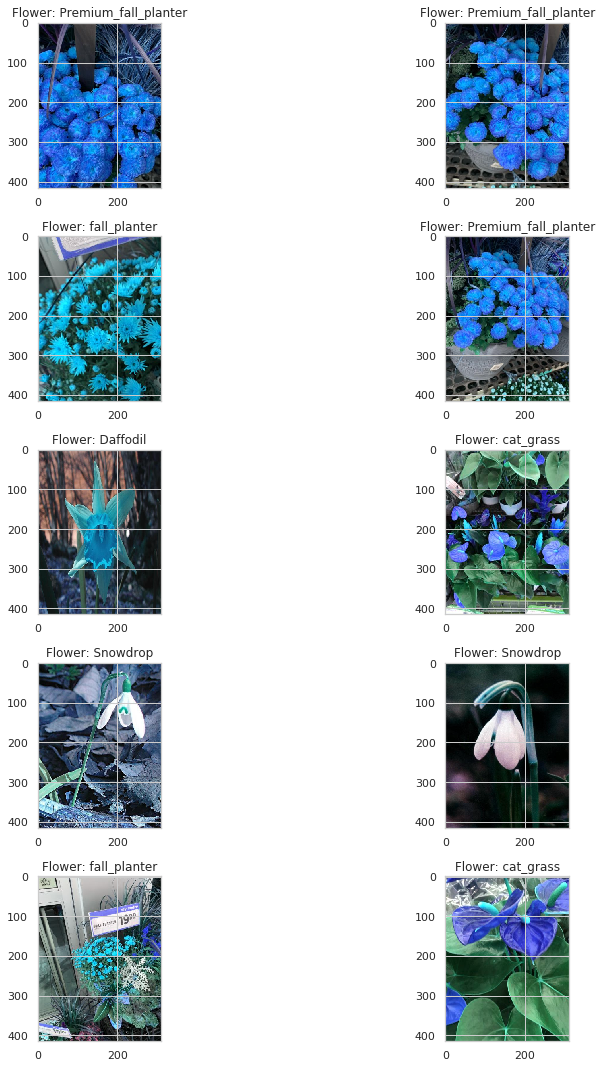

In [21]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### Label Encoding and scaling


In [23]:
le=LabelEncoder()
Y=le.fit_transform(Z)
print(list(le.classes_))
Y=to_categorical(Y,6)
X=np.array(X)
X=X/255

['Daffodil', 'LilyVally', 'Premium_fall_planter', 'Snowdrop', 'cat_grass', 'fall_planter']


### Spliting Training and testing set

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### Randomization of data

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

### Image Data Generator for Variance


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### ConvoNet

In [28]:
# # modelling starts using a CNN.
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (416,312,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(416))
model.add(Activation('relu'))
model.add(Dense(6, activation = "sigmoid"))


In [29]:
model.compile(keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 416, 312, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 208, 156, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 208, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 104, 78, 64)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 78, 96)       55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 52, 39, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 39, 128)      

In [32]:
batch_size=30
epochs=50
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 1.9245 - acc: 0.1733 - val_loss: 1.7161 - val_acc: 0.1845
Epoch 2/50
10/10 [==============================] - 9s 871ms/step - loss: 1.6199 - acc: 0.2078 - val_loss: 1.5136 - val_acc: 0.2816
Epoch 3/50
10/10 [==============================] - 9s 915ms/step - loss: 1.4987 - acc: 0.3340 - val_loss: 1.4229 - val_acc: 0.2913
Epoch 4/50
10/10 [==============================] - 9s 878ms/step - loss: 1.3248 - acc: 0.3825 - val_loss: 1.2388 - val_acc: 0.3981
Epoch 5/50
10/10 [==============================] - 9s 885ms/step - loss: 1.2756 - acc: 0.4346 - val_loss: 1.1274 - val_acc: 0.5146
Epoch 6/50
10/10 [==============================] - 9s 881ms/step - loss: 1.0974 - acc: 0.4799 - val_loss: 0.9964 - val_acc: 0.5437
Epoch 7/50
10/10 [==============================] - 9s 872ms/step - loss: 1.0094 - acc: 0.5689 - val_loss: 1.0815 

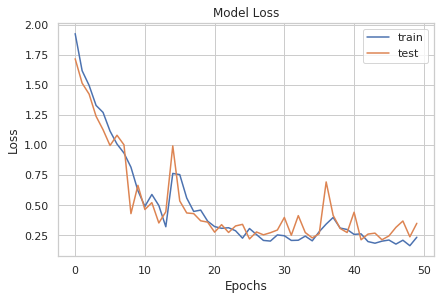

In [33]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

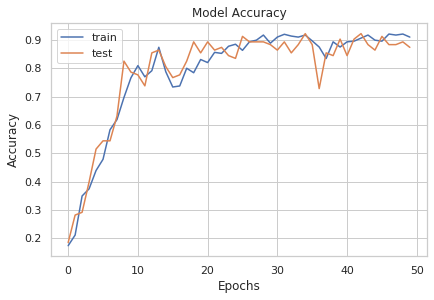

In [34]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### VGG16 

In [0]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(include_top=True,input_shape=(416,312,3),weights=None, classes=6)

In [55]:
print(model_vgg16.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 416, 312, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 416, 312, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 416, 312, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 208, 156, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 208, 156, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 208, 156, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 104, 78, 128)      0     

In [0]:
model_vgg16.compile(keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [1]:
batch_size=6
epochs=50
History = model_vgg16.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

NameError: ignored

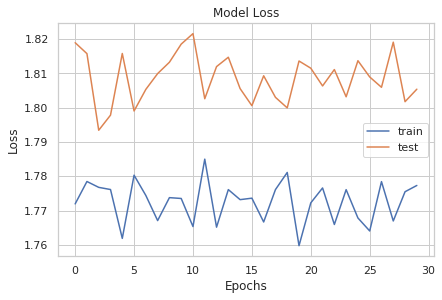

In [43]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

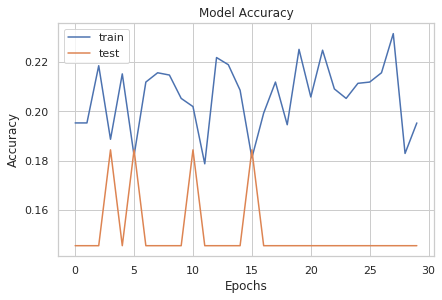

In [44]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Resnet V2

In [45]:
from keras.applications.resnet_v2 import resnet_v2
model_resnet = keras.applications.resnet_v2.ResNet50V2(include_top=True,input_shape=(416,312,3),weights=None, classes=6, pooling=None)

In [46]:
model_resnet.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 416, 312, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 422, 318, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 208, 156, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 210, 158, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [0]:
model_resnet.compile(keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
batch_size=10
epochs=50
History = model_resnet.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
30/30 [==============================] - 25s 849ms/step - loss: 0.4709 - acc: 0.8317 - val_loss: 1.5836 - val_acc: 0.6796
Epoch 2/50
30/30 [==============================] - 21s 714ms/step - loss: 0.4743 - acc: 0.8366 - val_loss: 3.1957 - val_acc: 0.6311
Epoch 3/50
30/30 [==============================] - 22s 720ms/step - loss: 0.4433 - acc: 0.8484 - val_loss: 1.2523 - val_acc: 0.8155
Epoch 4/50
30/30 [==============================] - 21s 716ms/step - loss: 0.3796 - acc: 0.8750 - val_loss: 1.2166 - val_acc: 0.7184
Epoch 5/50
30/30 [==============================] - 21s 716ms/step - loss: 0.3545 - acc: 0.8758 - val_loss: 0.5141 - val_acc: 0.8350
Epoch 6/50
30/30 [==============================] - 21s 716ms/step - loss: 0.4477 - acc: 0.8466 - val_loss: 6.1273 - val_acc: 0.3689
Epoch 7/50
30/30 [==============================] - 21s 715ms/step - loss: 0.5190 - acc: 0.8075 - val_loss: 0.9624 - val_acc: 0.7282
Epoch 8/50
30/30 [==============================] - 21s 714ms/step - 

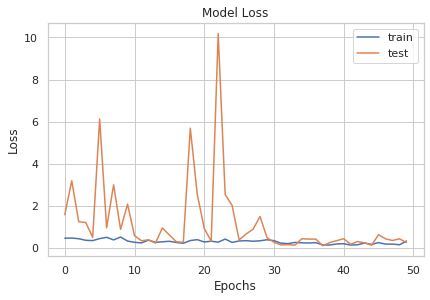

In [52]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

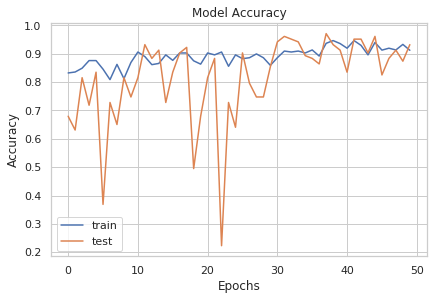

In [53]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()